In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
originaldf = pd.read_csv('car_details.csv')

In [57]:
df = originaldf

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [59]:
df.head(7)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner


In [60]:
df.drop('name', axis = 1, inplace = True) #name column is of no use

In [61]:
df['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [62]:
df = df[df['fuel'] != 'Electric']

In [63]:
df['fuel'] = df['fuel'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4}) #converting string object to integer object

C:\Users\mohit\AppData\Local\Temp\ipykernel_7888\970298646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fuel'] = df['fuel'].map({'Diesel':1,'Petrol':2,'CNG':3,'LPG':4}) #converting string object to integer object


In [64]:
df['seller_type'].value_counts()

Individual          3244
Dealer               993
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [65]:
df['seller_type'] = df['seller_type'].map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})

C:\Users\mohit\AppData\Local\Temp\ipykernel_7888\2395661264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seller_type'] = df['seller_type'].map({'Individual':1,'Dealer':2,'Trustmark Dealer':3})


In [66]:
df['transmission'].value_counts()

Manual       3892
Automatic     447
Name: transmission, dtype: int64

In [67]:
df['transmission'] = df['transmission'].map({'Manual':1,'Automatic':2})

C:\Users\mohit\AppData\Local\Temp\ipykernel_7888\4280202221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transmission'] = df['transmission'].map({'Manual':1,'Automatic':2})


In [68]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1105
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [69]:
df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

C:\Users\mohit\AppData\Local\Temp\ipykernel_7888\2763578461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['owner'] = df['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})


In [70]:
df.head() #quick check

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,2,1,1,1
1,2007,135000,50000,2,1,1,1
2,2012,600000,100000,1,1,1,1
3,2017,250000,46000,2,1,1,1
4,2014,450000,141000,1,1,1,2


In [93]:
df.corr() #to check what columns (independent variables) affect the price (dependent variable) and by how much

,year,selling_price,fuel,seller_type,transmission,owner
year,1.000000,0.408924,-0.116407,0.170242,0.146075,-0.437383
selling_price,0.408924,1.000000,-0.280086,0.233572,0.532117,-0.212711
fuel,-0.116407,-0.280086,1.000000,-0.025952,-0.044667,-0.011624
seller_type,0.170242,0.233572,-0.025952,1.000000,0.200230,-0.250439
transmission,0.146075,0.532117,-0.044667,0.200230,1.000000,-0.078267
owner,-0.437383,-0.212711,-0.011624,-0.250439,-0.078267,1.000000


In [72]:
df = df[df['owner']!=5] #steps to increase the correlation

In [73]:
df = df[df['fuel']!=4]

In [74]:
df = df[df['fuel']!=3]

In [75]:
df = df[df['owner']!=4]

In [76]:
df.drop('km_driven', axis =1, inplace = True) #dropping columns with less affect

In [77]:
df.columns #for determining the independent variables

Index(['year', 'selling_price', 'fuel', 'seller_type', 'transmission',
       'owner'],
      dtype='object')

In [78]:
x = df[['year', 'fuel', 'seller_type',
       'transmission', 'owner']]
y = df['selling_price']

In [79]:
from sklearn.model_selection import train_test_split

In [312]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.3,random_state =90) 

In [313]:
from sklearn.neighbors import KNeighborsRegressor #importing the algorithm
from sklearn.metrics import mean_squared_error #importing library for evaluating the model  

In [314]:
model1 = KNeighborsRegressor(n_neighbors = 4) #making the model

In [315]:
model1.fit(xtrain,ytrain) #Trained the model

KNeighborsRegressor(n_neighbors=4)

In [316]:
predictions = model1.predict(xtest)

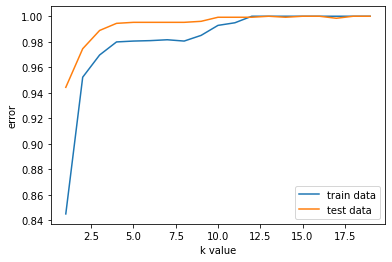

In [317]:
error1 = []
error2 = []
for k in range(1,20):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(xtrain,ytrain)
    prediction1 = model.predict(xtrain)
    error1.append(np.mean(ytrain!=prediction1))
    prediction2 = model.predict(xtest)
    error2.append(np.mean(ytest!=prediction2))
plt.plot(range(1,20),error1,label='train data')
plt.plot(range(1,20),error2, label= 'test data')
plt.xlabel('k value')
plt.ylabel('error')
plt.legend()

In [318]:
mean_squared_error(ytest,predictions)

219337871112.94012

In [319]:
model.score(xtrain,ytrain)

0.6611050044389001

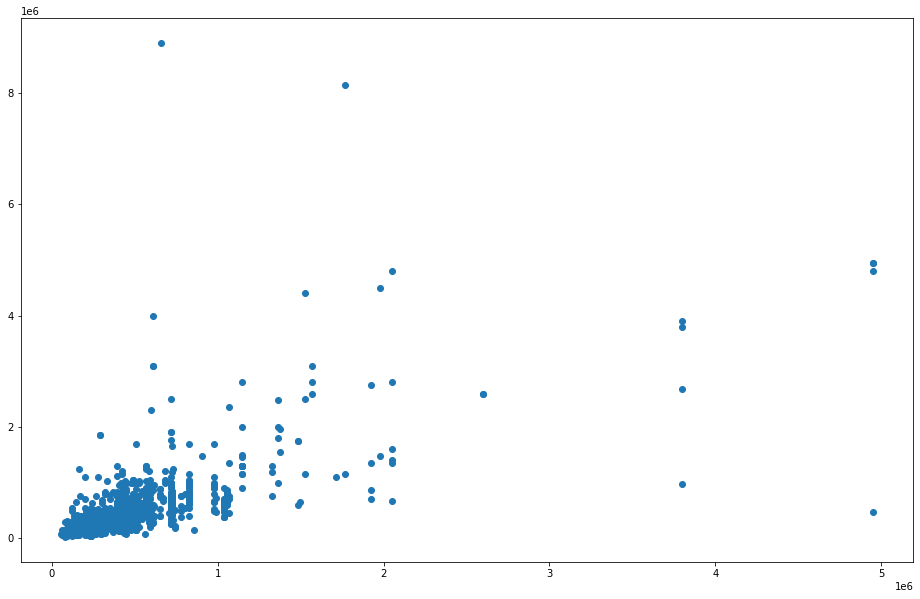

In [325]:
plt.figure(figsize = (16,10))
plt.scatter(predictions,ytest)